In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sukuriame duomenų lentelę
data = {
    "Formatas": ["CSV", "Parquet", "XLSX", "JSON", "HDF5", "Feather", "SQL"],
    "Įrašymo greitis (eil./s)": [100000, 200000, 10000, 50000, 300000, 500000, 50000],
    "Skaitymo greitis (eil./s)": [150000, 250000, 15000, 60000, 500000, 700000, 100000],
    "Failo dydis (MB)": [100, 20, 150, 120, 50, 25, 80],  # SQL dydis apskaičiuotas (~80 MB)
    "Pastabos": [
        "Lengvai skaitomas, bet dideli failai.",
        "Labai geras suspaudimas, tinka dideliems rinkiniams.",
        "Lėtas, bet naudingas vartotojams su Excel įrankiais.",
        "Didesnis failas dėl sudėtingos struktūros.",
        "Greitas, bet reikalauja specialių įrankių.",
        "Itin greitas, bet ne žmogui skaitomas.",
        "Leidžia papildomas užklausų galimybes.",
    ],
}

# Sukuriame Pandas DataFrame
df = pd.DataFrame(data)

  Formatas  Įrašymo greitis (eil./s)  Skaitymo greitis (eil./s)  \
5  Feather                    500000                     700000   
1  Parquet                    200000                     250000   
4     HDF5                    300000                     500000   
0      CSV                    100000                     150000   
6      SQL                     50000                     100000   
3     JSON                     50000                      60000   
2     XLSX                     10000                      15000   

   Failo dydis (MB)  Teigiamas rangas  
5                25        100.000000  
1                20         82.352941  
4                50         82.352941  
0               100         47.058824  
6                80         38.235294  
3               120         20.588235  
2               150          0.000000  


In [ ]:
# Normalizuojame kriterijus į procentus nuo didžiausios jų reikšmės
df["Įrašymo greitis (%)"] = df["Įrašymo greitis (eil./s)"] / df["Įrašymo greitis (eil./s)"].max() * 100
df["Skaitymo greitis (%)"] = df["Skaitymo greitis (eil./s)"] / df["Skaitymo greitis (eil./s)"].max() * 100

# Konvertuojame failo dydį į atvirkštinį (gerumo skalė: didesnė reikšmė = geriau)
df["Failo taupumas"] = 1 / df["Failo dydis (MB)"]
df["Failo taupumas (%)"] = df["Failo taupumas"] / df["Failo taupumas"].max() * 100

# Apskaičiuojame rangus
df["Įrašymo greitis (rangas)"] = df["Įrašymo greitis (eil./s)"].rank(ascending=False)
df["Skaitymo greitis (rangas)"] = df["Skaitymo greitis (eil./s)"].rank(ascending=False)
df["Failo dydis (rangas)"] = df["Failo taupumas"].rank(ascending=False)

# Apskaičiuojame rangų sumą ir išrikiuojame eiles
df["Rangų suma"] = (
    df["Įrašymo greitis (rangas)"]
    + df["Skaitymo greitis (rangas)"]
    + df["Failo dydis (rangas)"]
)
df = df.sort_values("Rangų suma")

rank_max=df["Rangų suma"].max()
rank_min=df["Rangų suma"].min()

df["Teigiamas rangas"] = (rank_max-df["Rangų suma"])/(rank_max-rank_min)*100

# Lentelės rodymas konsolėje
print(df[["Formatas", "Įrašymo greitis (eil./s)", "Skaitymo greitis (eil./s)", "Failo dydis (MB)","Teigiamas rangas"]])

In [50]:
df[["Formatas", "Teigiamas rangas", "Pastabos"]].style

,Formatas,Teigiamas rangas,Pastabos
5,Feather,100.000000,"Itin greitas, bet ne žmogui skaitomas."
1,Parquet,82.352941,"Labai geras suspaudimas, tinka dideliems rinkiniams."
4,HDF5,82.352941,"Greitas, bet reikalauja specialių įrankių."
0,CSV,47.058824,"Lengvai skaitomas, bet dideli failai."
6,SQL,38.235294,Leidžia papildomas užklausų galimybes.
3,JSON,20.588235,Didesnis failas dėl sudėtingos struktūros.
2,XLSX,0.000000,"Lėtas, bet naudingas vartotojams su Excel įrankiais."


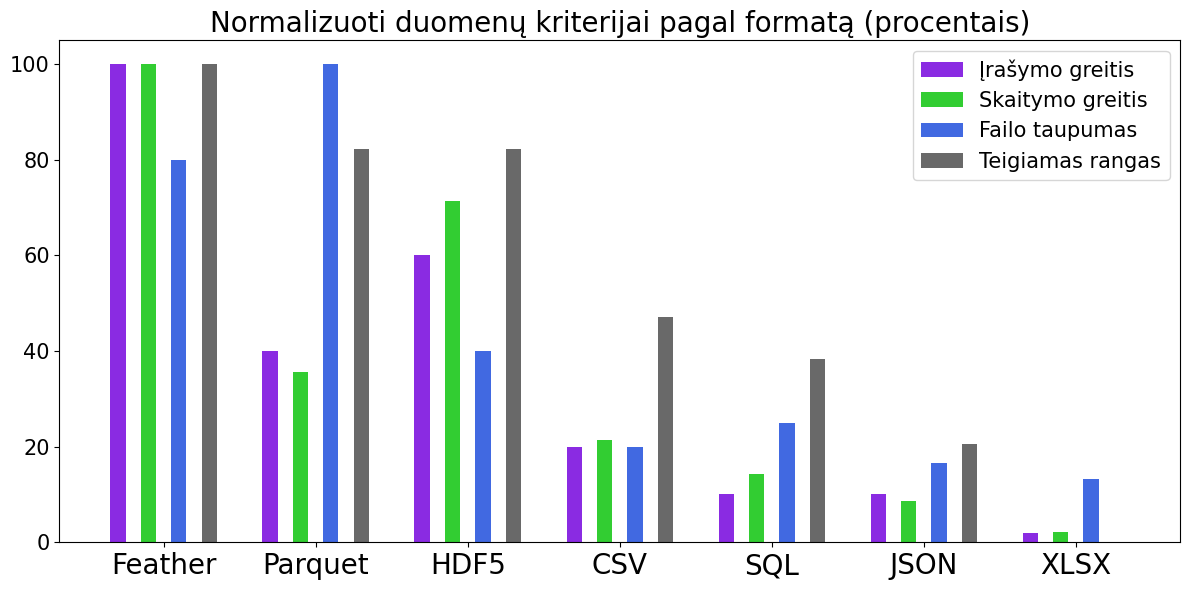

In [54]:
# Sukuriame stulpelinę diagramą
x = np.arange(len(df["Formatas"]))  # Formatų indeksai
width = 0.1  # Stulpelio plotis

plt.figure(figsize=(12, 6))
plt.bar(x-3*width, df["Įrašymo greitis (%)"], width, label="Įrašymo greitis", color="blueviolet")
plt.bar(x-width,   df["Skaitymo greitis (%)"], width, label="Skaitymo greitis", color="limegreen")
plt.bar(x+width,   df["Failo taupumas (%)"], width, label="Failo taupumas", color="royalblue")
plt.bar(x+3*width, df["Teigiamas rangas"], width, label="Teigiamas rangas", color="dimgray")

# Diagramos parametrai
plt.title("Normalizuoti duomenų kriterijai pagal formatą (procentais)",fontsize=20)
# plt.xlabel("Formatas")
plt.xticks(x, df["Formatas"], rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

# Išsaugome ir parodome diagramą
plt.savefig("normalizuoti_formatu_duomenys.png")
plt.show()


In [ ]:
# https://www.geeksforgeeks.org/how-to-set-tick-labels-font-size-in-matplotlib/
# https://matplotlib.org/3.1.1/gallery/color/named_colors.html

In [71]:
print("Testuojame DF įrašymą skirtingais formatais")

Testuojame DF įrašymą skirtingais formatais


In [100]:
import pandas as pd
import numpy as np
import random
import string
from typing import Dict

def generate_random_password(length: int = 8) -> str:
    """Sukuria atsitiktinį slaptažodį, susidedantį iš raidžių ir skaičių."""
    characters = string.ascii_letters + string.digits
    return ''.join(random.choices(characters, k=length))

def create_dataframe(num_records: int) -> pd.DataFrame:
    """Sukuria pandas DataFrame su nurodytu atsitiktinių įrašų skaičiumi."""
    nato= ["alpha", "bravo", "charlie", "delta", "echo", "fox-trot", "golf", "hotel", "india","juliet", "kilo", "lima", "mike", "november", "oscar", "papa", "quebec", "romeo", "sierra", "tango", "uniform", "victor", "whiskey", "x-ray", "yankee", "zulu" ]
    data: Dict[str, list] = {
        'ID': np.arange(1, num_records + 1),  # Unikalūs ID
        'Random_Int': np.random.randint(1, 100, num_records),  # Atsitiktiniai sveikieji skaičiai
        'Random_Float': np.random.random(num_records),  # Atsitiktiniai slankieji skaičiai [0, 1)
        'Category': np.random.choice(nato, num_records),  # Kategoriniai duomenys
        'Password': [generate_random_password() for _ in range(num_records)]  # Atsitiktiniai slaptažodžiai
    }
    return pd.DataFrame(data)

# Sukuriame DataFrame su milijonu įrašų
num_records = 1_000_000
df = create_dataframe(num_records)

# Peržiūrime pirmas kelias eilutes
print(df.head(3))

# Patikriname duomenų rėmelio dydį
print(f"Duomenų rėmelis turi {len(df)} įrašų.")

   ID  Random_Int  Random_Float  Category  Password
0   1          95      0.742827  fox-trot  p2hIEBNx
1   2          95      0.365146    quebec  OiYvkyCb
2   3          84      0.488031      lima  Z8zHCra6
Duomenų rėmelis turi 1000000 įrašų.


In [101]:
df.head(7)

,ID,Random_Int,Random_Float,Category,Password
0,1,95,0.742827,fox-trot,p2hIEBNx
1,2,95,0.365146,quebec,OiYvkyCb
2,3,84,0.488031,lima,Z8zHCra6
3,4,40,0.029124,hotel,agCdnlZ2
4,5,44,0.983143,delta,ooWWXY7G
5,6,53,0.451960,x-ray,koLpFIWQ
6,7,10,0.716063,mike,ooTIWwtT


In [102]:
import pandas as pd
import time
import os
import h5py

# Sukuriame pavyzdinį DataFrame su daugiau eilučių
# data = {'A': range(1, 10001), 'B': range(10001, 20001)}
# df = pd.DataFrame(data)

print(df.head(5),end='\n\n')

# Formatų sąrašas ir rezultatai
formats = ["Feather", "Parquet", "HDF5"]
file_extensions = ["feather", "parquet", "h5"]
write_times = []
read_times = []
file_names = []
file_sizes = []

# Feather
file_name = 'data.feather'
start_time = time.time()
df.to_feather(file_name)
write_times.append(time.time() - start_time)

start_time = time.time()
df_feather = pd.read_feather(file_name)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# Parquet
file_name = 'data.parquet'
start_time = time.time()
df.to_parquet(file_name)
write_times.append(time.time() - start_time)

start_time = time.time()
df_parquet = pd.read_parquet(file_name)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# HDF5
file_name = 'data.h5'
start_time = time.time()
with h5py.File(file_name, 'w') as f:
    for column in df.columns:
        f.create_dataset(column, data=df[column].values)
write_times.append(time.time() - start_time)

start_time = time.time()
with h5py.File(file_name, 'r') as f:
    df_hdf5 = pd.DataFrame({column: f[column][:] for column in f.keys()})
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# Rezultatų lentelė
results = pd.DataFrame({
    "Formatas": formats,
    "Failo pavadinimas": file_names,
    "Failo dydis (baitais)": file_sizes,
    "Įrašymo trukmė (s)": write_times,
    "Skaitymo trukmė (s)": read_times
})

# Spausdiname rezultatus
print(results)


   ID  Random_Int  Random_Float  Category  Password
0   1          95      0.742827  fox-trot  p2hIEBNx
1   2          95      0.365146    quebec  OiYvkyCb
2   3          84      0.488031      lima  Z8zHCra6
3   4          40      0.029124     hotel  agCdnlZ2
4   5          44      0.983143     delta  ooWWXY7G

  Formatas Failo pavadinimas  Failo dydis (baitais)  Įrašymo trukmė (s)  \
0  Feather      data.feather               33295762            0.297997   
1  Parquet      data.parquet               24317163            0.622731   
2     HDF5           data.h5              104017408            1.897743   

   Skaitymo trukmė (s)  
0             0.552007  
1             0.643018  
2             1.415591  


In [103]:

# Pasirinktinai: pašalinti sugeneruotus failus
for file_name in file_names:
    if os.path.exists(file_name):
        os.remove(file_name)

In [ ]:
# Apdorojamas anksčiau sukurtas df.

import pandas as pd
import sqlite3
import time
import os
import h5py

# Sukuriame pavyzdinį DataFrame su daugiau eilučių
# data = {'A': range(1, 10001), 'B': range(10001, 20001)}
# df = pd.DataFrame(data)

print(df.head(5),end='\n\n')

# Formatų sąrašas ir rezultatai
formats = ["CSV", "Parquet", "JSON", "HDF5", "Feather", "SQL"]
file_extensions = ["csv", "parquet", "json", "h5", "feather", "db"]
write_times = []
read_times = []
file_names = []
file_sizes = []

# CSV
file_name = 'data.csv'
start_time = time.time()
df.to_csv(file_name, index=False)
write_times.append(time.time() - start_time)

start_time = time.time()
df_csv = pd.read_csv(file_name)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# Parquet
file_name = 'data.parquet'
start_time = time.time()
df.to_parquet(file_name)
write_times.append(time.time() - start_time)

start_time = time.time()
df_parquet = pd.read_parquet(file_name)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# JSON
file_name = 'data.json'
start_time = time.time()
df.to_json(file_name, orient='records', lines=True)
write_times.append(time.time() - start_time)

start_time = time.time()
df_json = pd.read_json(file_name, orient='records', lines=True)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# HDF5
file_name = 'data.h5'
start_time = time.time()
with h5py.File(file_name, 'w') as f:
    for column in df.columns:
        f.create_dataset(column, data=df[column].values)
write_times.append(time.time() - start_time)

start_time = time.time()
with h5py.File(file_name, 'r') as f:
    df_hdf5 = pd.DataFrame({column: f[column][:] for column in f.keys()})
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# Feather
file_name = 'data.feather'
start_time = time.time()
df.to_feather(file_name)
write_times.append(time.time() - start_time)

start_time = time.time()
df_feather = pd.read_feather(file_name)
read_times.append(time.time() - start_time)
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# SQL
file_name = 'data.db'
conn = sqlite3.connect(file_name)
start_time = time.time()
df.to_sql('data_table', conn, index=False, if_exists='replace')
write_times.append(time.time() - start_time)

start_time = time.time()
df_sql = pd.read_sql('SELECT * FROM data_table', conn)
read_times.append(time.time() - start_time)
conn.close()
file_names.append(file_name)
file_sizes.append(os.path.getsize(file_name))

# Rezultatų lentelė
results = pd.DataFrame({
    "Formatas": formats,
    "Failo pavadinimas": file_names,
    "Failo dydis (baitais)": file_sizes,
    "Įrašymo trukmė (s)": write_times,
    "Skaitymo trukmė (s)": read_times
})

# Spausdiname rezultatus
print(results)

   ID  Random_Int  Random_Float  Category  Password
0   1          95      0.742827  fox-trot  p2hIEBNx
1   2          95      0.365146    quebec  OiYvkyCb
2   3          84      0.488031      lima  Z8zHCra6
3   4          40      0.029124     hotel  agCdnlZ2
4   5          44      0.983143     delta  ooWWXY7G

  Formatas Failo pavadinimas  Failo dydis (baitais)  Įrašymo trukmė (s)  \
0      CSV          data.csv               44449761            5.447036   
1  Parquet      data.parquet               24317163            0.553415   
2     JSON         data.json               99068131            2.660681   
3     HDF5           data.h5              104017408            1.692741   
4  Feather      data.feather               33295762            0.366184   
5      SQL           data.db               37662720            3.295670   

   Skaitymo trukmė (s)  
0             1.087664  
1             0.560909  
2             4.270594  
3             1.228240  
4             0.512632  
5          

In [113]:
# Pasirinktinai: pašalinti sugeneruotus failus
for file_name in file_names:
    if os.path.exists(file_name):
        os.remove(file_name)


In [109]:
results

,Formatas,Failo pavadinimas,Failo dydis (baitais),Įrašymo trukmė (s),Skaitymo trukmė (s),Įrašymo greitis (eil./s),Skaitymo greitis (eil./s),Failo dydis (MB)
0,CSV,data.csv,44449761,5.447036,1.087664,0.183586,0.919402,44.449761
1,Parquet,data.parquet,24317163,0.553415,0.560909,1.806962,1.782820,24.317163
2,JSON,data.json,99068131,2.660681,4.270594,0.375844,0.234159,99.068131
3,HDF5,data.h5,104017408,1.692741,1.228240,0.590758,0.814173,104.017408
4,Feather,data.feather,33295762,0.366184,0.512632,2.730871,1.950716,33.295762
5,SQL,data.db,37662720,3.295670,2.882405,0.303428,0.346933,37.662720


In [ ]:
# Pakeičiame stulpelių pavadinimus
# results.columns = ["Formatas", "Failo Pavadinimas", "Failo dydis (MB)", "Įrašymo Laikas (s)", "Skaitymo Laikas (s)"]

In [108]:
df = results

df['Įrašymo greitis (eil./s)']=1/df['Įrašymo trukmė (s)']
df['Skaitymo greitis (eil./s)']=1/df['Skaitymo trukmė (s)']
df['Failo dydis (MB)']=df['Failo dydis (baitais)']/1000000

In [110]:
df

,Formatas,Failo pavadinimas,Failo dydis (baitais),Įrašymo trukmė (s),Skaitymo trukmė (s),Įrašymo greitis (eil./s),Skaitymo greitis (eil./s),Failo dydis (MB)
0,CSV,data.csv,44449761,5.447036,1.087664,0.183586,0.919402,44.449761
1,Parquet,data.parquet,24317163,0.553415,0.560909,1.806962,1.782820,24.317163
2,JSON,data.json,99068131,2.660681,4.270594,0.375844,0.234159,99.068131
3,HDF5,data.h5,104017408,1.692741,1.228240,0.590758,0.814173,104.017408
4,Feather,data.feather,33295762,0.366184,0.512632,2.730871,1.950716,33.295762
5,SQL,data.db,37662720,3.295670,2.882405,0.303428,0.346933,37.662720


In [111]:
# Normalizuojame kriterijus į procentus nuo didžiausios jų reikšmės
df["Įrašymo greitis (%)"] = df["Įrašymo greitis (eil./s)"] / df["Įrašymo greitis (eil./s)"].max() * 100
df["Skaitymo greitis (%)"] = df["Skaitymo greitis (eil./s)"] / df["Skaitymo greitis (eil./s)"].max() * 100

# Konvertuojame failo dydį į atvirkštinį (gerumo skalė: didesnė reikšmė = geriau)
df["Failo taupumas"] = 1 / df["Failo dydis (MB)"]
df["Failo taupumas (%)"] = df["Failo taupumas"] / df["Failo taupumas"].max() * 100

# Apskaičiuojame rangus
df["Įrašymo greitis (rangas)"] = df["Įrašymo greitis (eil./s)"].rank(ascending=False)
df["Skaitymo greitis (rangas)"] = df["Skaitymo greitis (eil./s)"].rank(ascending=False)
df["Failo dydis (rangas)"] = df["Failo taupumas"].rank(ascending=False)

# Apskaičiuojame rangų sumą ir išrikiuojame eiles
df["Rangų suma"] = (
    df["Įrašymo greitis (rangas)"]
    + df["Skaitymo greitis (rangas)"]
    + df["Failo dydis (rangas)"]
)
df = df.sort_values("Rangų suma")

rank_max=df["Rangų suma"].max()
rank_min=df["Rangų suma"].min()

df["Teigiamas rangas"] = (rank_max-df["Rangų suma"])/(rank_max-rank_min)*100

# Lentelės rodymas konsolėje
print(df[["Formatas", "Įrašymo greitis (eil./s)", "Skaitymo greitis (eil./s)", "Failo dydis (MB)","Teigiamas rangas"]])

  Formatas  Įrašymo greitis (eil./s)  Skaitymo greitis (eil./s)  \
4  Feather                  2.730871                   1.950716   
1  Parquet                  1.806962                   1.782820   
0      CSV                  0.183586                   0.919402   
3     HDF5                  0.590758                   0.814173   
5      SQL                  0.303428                   0.346933   
2     JSON                  0.375844                   0.234159   

   Failo dydis (MB)  Teigiamas rangas  
4         33.295762        100.000000  
1         24.317163         90.909091  
0         44.449761         18.181818  
3        104.017408         18.181818  
5         37.662720         18.181818  
2         99.068131          0.000000  


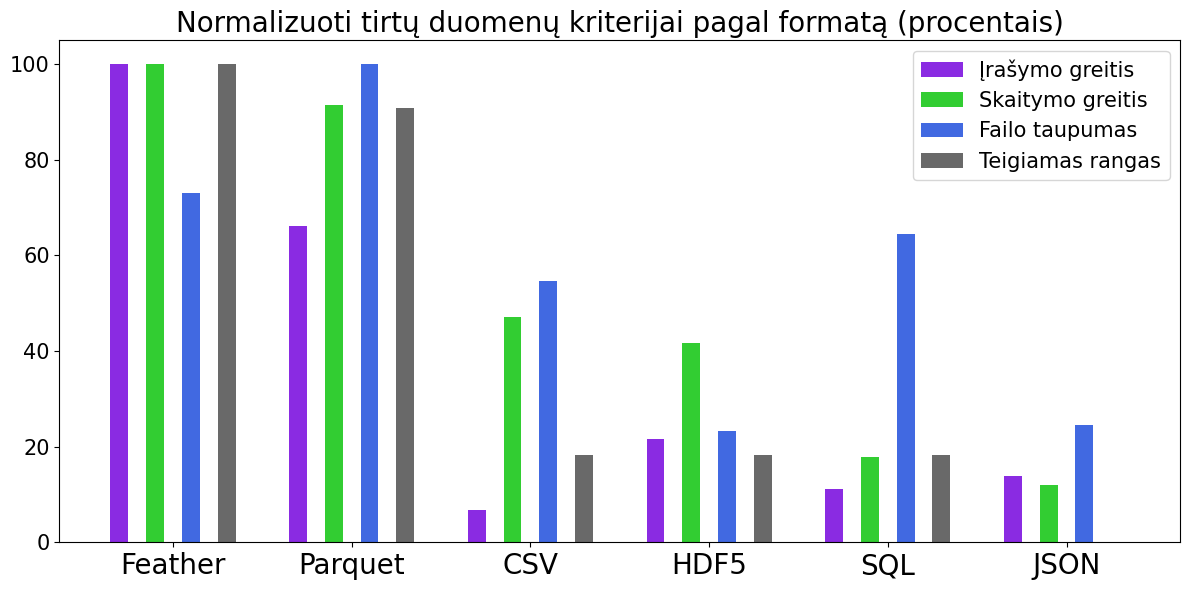

In [112]:
# Sukuriame stulpelinę diagramą
x = np.arange(len(df["Formatas"]))  # Formatų indeksai
width = 0.1  # Stulpelio plotis

plt.figure(figsize=(12, 6))
plt.bar(x-3*width, df["Įrašymo greitis (%)"], width, label="Įrašymo greitis", color="blueviolet")
plt.bar(x-width,   df["Skaitymo greitis (%)"], width, label="Skaitymo greitis", color="limegreen")
plt.bar(x+width,   df["Failo taupumas (%)"], width, label="Failo taupumas", color="royalblue")
plt.bar(x+3*width, df["Teigiamas rangas"], width, label="Teigiamas rangas", color="dimgray")

# Diagramos parametrai
plt.title("Normalizuoti tirtų duomenų kriterijai pagal formatą (procentais)",fontsize=20)
# plt.xlabel("Formatas")
plt.xticks(x, df["Formatas"], rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

# Išsaugome ir parodome diagramą
plt.savefig("normalizuoti_tirtu_formatu_duomenys.png")
plt.show()